<a href="https://colab.research.google.com/github/alexkardan/ABS-Visualizations/blob/main/ABS_Weekly_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
Weekly_High_Volume_Store = pd.read_csv("Montgomery College Data Set (High Volume_Weekly).csv")

*   The High volume store is the Montrose store located on Rockville Pike
*   The medium volume store is located on Old Columbia Pike
*   The low volume store is located in Flower Ave Store located on the corner of Flower Ave and Piney Branch

In [3]:
Weekly_High_Volume_Store.describe()

,Week,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,11.596806,16.113772,16.115768,17.209581,17.055888,19.015968,18.926148,16.564870,15.812375,15.732535,...,22.720559,21.323353,20.904192,20.820359,26.840319,18.720559,21.994012,25.790419,24.700599,13.191617
std,20.220908,21.935201,21.933959,25.298023,25.186522,27.830123,28.241822,23.582075,23.201826,22.824818,...,32.733496,31.449821,31.591372,29.901366,39.455778,26.755967,33.418467,39.302951,36.078223,22.718873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,3.000000,1.000000,4.000000,3.000000,1.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,4.000000,5.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,6.000000,10.000000,10.000000,11.000000,10.000000,12.000000,11.000000,10.000000,10.000000,9.000000,...,12.000000,12.000000,12.000000,12.000000,16.000000,10.000000,12.000000,15.000000,15.000000,6.000000
75%,13.000000,20.000000,20.000000,22.000000,20.000000,23.000000,24.000000,20.000000,19.000000,19.000000,...,28.000000,24.000000,24.000000,24.000000,31.000000,24.000000,25.000000,29.000000,28.000000,14.000000
max,230.000000,181.000000,181.000000,280.000000,210.000000,240.000000,252.000000,189.000000,260.000000,215.000000,...,224.000000,211.000000,204.000000,216.000000,294.000000,184.000000,290.000000,420.000000,270.000000,211.000000


In [4]:
Weekly_High_Volume_Store.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Week,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
496,18798,TRULY VODKA SELTZER VARIETY 3/8 CANS,24,2.37375,8,8,8,8,16,0,...,0,8,0,0,16,16,0,0,0,394
497,297232,POST MERIDIEM SOUTHSIDE 24/100ML,24,4.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
498,83305,K JACKSON VINT RES S/BLC - 750ML,12,14.99,0,2,2,5,7,4,...,5,1,5,3,9,18,21,12,6,382
499,36722,KETEL ONE VODKA - 750ML,12,27.99,2,8,8,5,5,7,...,2,13,4,9,5,11,10,13,6,399
500,330401,JOSH CELLARS S/BLC - 750ML,12,16.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29


In [5]:
Weekly_High_Volume_Store = pd.read_csv("Montgomery College Data Set (High Volume_Weekly).csv", header=1)
Weekly_High_Volume_Store = Weekly_High_Volume_Store.loc[:, ~Weekly_High_Volume_Store.columns.str.contains("^Unnamed")]

In [6]:
grand_total_column = Weekly_High_Volume_Store.iloc[:, -1]

Weekly_High_Volume_Store = Weekly_High_Volume_Store.iloc[:, :-1]

new_columns = ["Item ID", "Description", "Bottles Per Case", "Cost Amount (Per Bottle)"]

num_weeks = len(Weekly_High_Volume_Store.columns) - len(new_columns)
week_columns = [f"Week {i+1}" for i in range(num_weeks)]

final_columns = new_columns + week_columns

Weekly_High_Volume_Store.columns = final_columns

Weekly_High_Volume_Store = pd.concat([Weekly_High_Volume_Store, grand_total_column], axis=1)

Weekly_High_Volume_Store.columns = list(Weekly_High_Volume_Store.columns[:-1]) + ['Grand Total']

print(Weekly_High_Volume_Store.head())
print(Weekly_High_Volume_Store.columns)

   Item ID                           Description  Bottles Per Case  \
0    18467                   SCOTTY'S VODKA 50ML                96   
1    96741            CORONA EXTRA 4/6 NR - 12OZ                24   
2    70417  FIREBALL CINN WHISKY 50ML/10PK LOOSE               120   
3   249230       FIREBALL WHISKY 10PK SLV - 50ML               120   
4    35211                 SMIRNOFF VODKA - 50ML               120   

   Cost Amount (Per Bottle)  Week 1  Week 2  Week 3  Week 4  Week 5  Week 6  \
0                  0.990000      60      93      93      94      89     114   
1                  1.831667     162       0       0     144     144     132   
2                  1.090000      62     170     170     108     166     141   
3                  1.090000     230     100     100     280     210     240   
4                  0.990000     142     181     181     154     167     224   

   ...  Week 45  Week 46  Week 47  Week 48  Week 49  Week 50  Week 51  \
0  ...      164      170      1

Trying to organize the dataset to recognize each week as week 1, week 2 etc. and for all the column headings to be read properly as it wasnt reading the columns Item ID, Description, Bottles Per Case and Cost Amount (Per Bottle)

In [7]:
last_column = Weekly_High_Volume_Store.iloc[:, -1]
last_column

,Grand Total
0,7690
1,7478
2,7520
3,7391
4,7404
...,...
495,394
496,29
497,382
498,399


The last column in all of these stores are the grand totals in quantity sold for all of the top 500 items so I wanted to get an idea of what are the differing amounts for visualizations to make sure the numbers are at least accurate and similiar to the dataset and didnt misinterpret them.


In [8]:
quarterly_mapping = {
    'Q1': [f'Week {i}' for i in range(1, 13)],
    'Q2': [f'Week {i}' for i in range(14, 27)],
    'Q3': [f'Week {i}' for i in range(28, 40)],
    'Q4': [f'Week {i}' for i in range(41, 53)]
}

week_to_quarter = {week: quarter for quarter, weeks in quarterly_mapping.items() for week in weeks}

week_columns = [f'Week {i}' for i in range(1, 54)]


melted_Weekly_High_Volume_Store = Weekly_High_Volume_Store.melt(
    id_vars=["Item ID", "Description", "Bottles Per Case", "Cost Amount (Per Bottle)"],
    value_vars=week_columns,
    var_name="Week",
    value_name="Quantity"
)






I used ChatGPT for the first part of the naming of the quarterly_mapping in order to categorize all the weeks into 4 different quarters and used it also for the week_to_quarter line. The rest of the lines I melted the High_volume_Store into less columns and variables.

In [9]:
Weekly_High_Volume_Store.columns

Index(['Item ID', 'Description', 'Bottles Per Case',
       'Cost Amount (Per Bottle)', 'Week 1', 'Week 2', 'Week 3', 'Week 4',
       'Week 5', 'Week 6', 'Week 7', 'Week 8', 'Week 9', 'Week 10', 'Week 11',
       'Week 12', 'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17',
       'Week 18', 'Week 19', 'Week 20', 'Week 21', 'Week 22', 'Week 23',
       'Week 24', 'Week 25', 'Week 26', 'Week 27', 'Week 28', 'Week 29',
       'Week 30', 'Week 31', 'Week 32', 'Week 33', 'Week 34', 'Week 35',
       'Week 36', 'Week 37', 'Week 38', 'Week 39', 'Week 40', 'Week 41',
       'Week 42', 'Week 43', 'Week 44', 'Week 45', 'Week 46', 'Week 47',
       'Week 48', 'Week 49', 'Week 50', 'Week 51', 'Week 52', 'Week 53',
       'Grand Total'],
      dtype='object')

In [10]:
def categorize_items(Description):

  if 'WHISKEY' in Description :
    return 'Whiskey'
  elif 'BEER' in Description:
    return 'Beer'
  elif 'WINE' in Description:
    return 'Wine'
  elif 'VODKA' in Description:
    return 'Vodka'
  elif 'TEQUILA' in Description:
    return 'Tequila'
  elif 'CORONA':
    return 'Corona'
  else:
    return 'Other'

Creating if, elif, else statements that when the those alcohol types are found in the description to label it as that specific alcohol type

In [11]:
Weekly_High_Volume_Store['Description'] = Weekly_High_Volume_Store['Description'].apply(categorize_items)

In [12]:
melted_sales_data = Weekly_High_Volume_Store.melt(id_vars=['Item ID', 'Description', 'Bottles Per Case'],
                                                         value_vars= week_columns,
                                                         var_name='Week', value_name='Quantity Total')

melted_sales_data['Quarter'] = melted_sales_data['Week'].map(week_to_quarter)




melting the sales data for each week into a new column of Quarter that way for visualizations it will map all of the numbers in each week and categorize it by the quarter it corresponds with

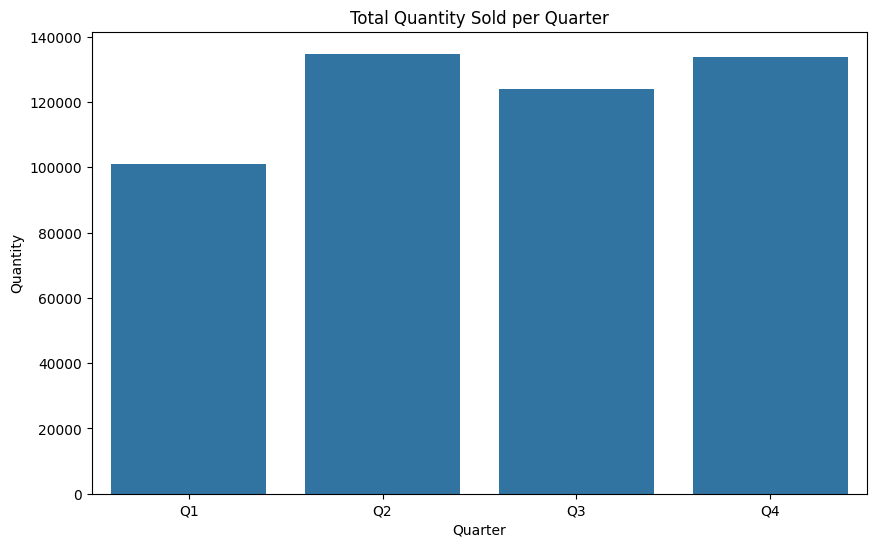

In [13]:
quarterly_sales = melted_sales_data.groupby(['Description', 'Quarter'])['Quantity Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Quantity Total', data=quarterly_sales, estimator=sum, errorbar=None)
plt.title('Total Quantity Sold per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Quantity')
plt.show()

grouped the melted_sales_data by description, quarter and Quantity total summing it all up. I used this grouping to create a bar chart that details the quantity sold per quarter

In [14]:
quarterly_sales = melted_sales_data.groupby(['Description', 'Quarter'])['Quantity Total'].sum().reset_index()

quarterly_sales["Quarter Velocity"] = quarterly_sales["Quantity Total"]/13.25

dividing by 13.25 as this dataset contains 53 weeks as 2024 was a gap year thus dividing by 13.25 is exactly 1/4 thus dividing the entirety of each quarter to its weekly quantity total

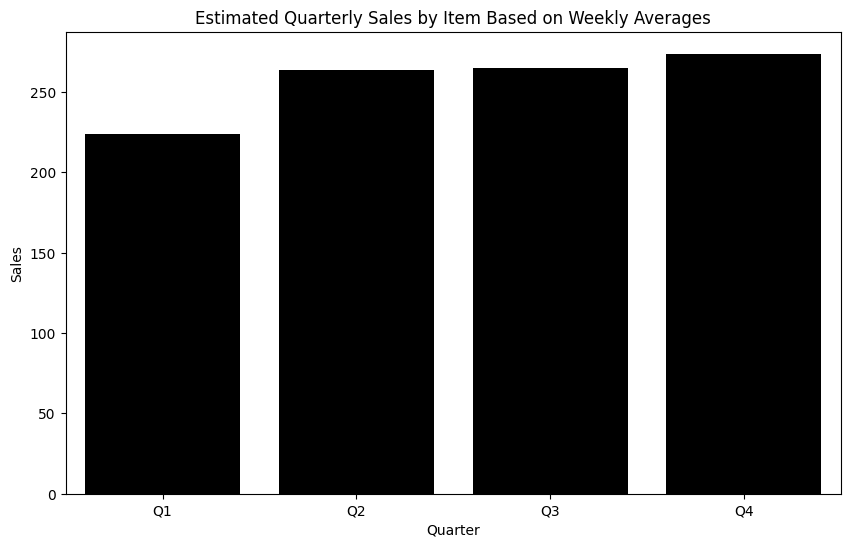

In [15]:
quarterly_sales = melted_sales_data.groupby(['Description', 'Quarter'])['Quantity Total'].mean().reset_index()

quarterly_sales['Estimated Quarterly Total'] = quarterly_sales['Quantity Total'] * 13

plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Estimated Quarterly Total', color = 'black', data=quarterly_sales, errorbar=None)
plt.title('Estimated Quarterly Sales by Item Based on Weekly Averages')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()

This barchart shows the weekly average sold for each item within each quarter

In [16]:
fig = px.box(Weekly_High_Volume_Store,
            x = "Description",
             y = "Grand Total",
             color = "Description",
             title = "Total Quantity Sold per Alcohol Type"
             )
fig.show()

This boxplot shows the total quantity sold for every alcohol type

In [17]:
def categorize_items(Description):

  if 'WHISKEY' in Description :
    return 'Whiskey'
  elif 'BEER' in Description:
    return 'Beer'
  elif 'VODKA' in Description:
    return 'Vodka'
  elif 'TEQUILA' in Description:
    return 'Tequila'
  elif 'CORONA':
    return 'Corona'
  else:
    return 'Other'

In [18]:
quarterly_sales['Description'] = quarterly_sales['Description'].apply(categorize_items)

grouping the if, elif, else function and applying it to the description column so every dataset the x labels can show each alcohol type that was present in the dataset

In [19]:
quarterly_sales = melted_sales_data.groupby(['Description', 'Quarter'])['Quantity Total'].mean().reset_index()

quarterly_sales["Quarter Velocity"] = quarterly_sales["Quantity Total"]/7

I am creating a new column in Quarter Velocity which is using the quantity total average which does each weekly total and dividing it by 7 to get the daily average sold for every alcohol type

In [20]:
five_week_sales = melted_sales_data.copy()

five_week_sales['Week Number'] = five_week_sales['Week'].str.extract('Week (\d+)').astype(int)

five_week_sales['5-Week Group'] = ((five_week_sales['Week Number'] - 1) // 5) + 1

grouped_sales = five_week_sales.groupby(['Description', '5-Week Group'])['Quantity Total'].sum().reset_index()

grouped_sales.rename(columns={'Quantity Total': '5-Week Velocity'}, inplace=True)

fig = px.box(grouped_sales,
             x = "Description",
             y = "5-Week Velocity",
             color = "Description",
             title = "Total quantity sold for every 5 weeks",
             labels = {"Description": "Alcohol Types", "Quarter Velocity": "Total Quantity Sold"})
fig.show()

In [21]:
ten_week_sales = melted_sales_data.copy()

ten_week_sales['Week Number'] = ten_week_sales['Week'].str.extract('Week (\d+)').astype(int)

ten_week_sales['10-Week Group'] = ((ten_week_sales['Week Number'] - 1) // 10) + 1

grouped_sales = ten_week_sales.groupby(['Description', '10-Week Group'])['Quantity Total'].sum().reset_index()

grouped_sales.rename(columns={'Quantity Total': '10-Week Velocity'}, inplace=True)

fig = px.box(grouped_sales,
             x = "Description",
             y = "10-Week Velocity",
             color = "Description",
             title = "Total quantity sold for every 10 weeks",
             labels = {"Description": "Alcohol Types", "Quarter Velocity": "Total Quantity Sold"})
fig.show()

In [22]:
fifteen_week_sales = melted_sales_data.copy()

fifteen_week_sales['Week Number'] = fifteen_week_sales['Week'].str.extract('Week (\d+)').astype(int)

fifteen_week_sales['15-Week Group'] = ((fifteen_week_sales['Week Number'] - 1) // 15) + 1

grouped_sales = fifteen_week_sales.groupby(['Description', '15-Week Group'])['Quantity Total'].sum().reset_index()

grouped_sales.rename(columns={'Quantity Total': '15-Week Velocity'}, inplace=True)

fig = px.box(grouped_sales,
             x = "Description",
             y = "15-Week Velocity",
             color = "Description",
             title = "Total quantity sold for every 15 weeks",
             labels = {"Description": "Alcohol Types", "Quarter Velocity": "Total Quantity Sold"}
             )
fig.show()

In [23]:
fifty_two_week_sales = melted_sales_data.copy()

fifty_two_week_sales['Week Number'] = fifty_two_week_sales['Week'].str.extract('Week (\d+)').astype(int)
fifty_two_week_sales['15-Week Group'] = ((fifty_two_week_sales['Week Number'] - 1) // 52) + 1

grouped_sales = fifty_two_week_sales.groupby(['Description', '15-Week Group'])['Quantity Total'].sum().reset_index()

grouped_sales.rename(columns={'Quantity Total': '52-week Velocity'}, inplace=True)

fig = px.box(grouped_sales,
             x = "Description",
             y = "52-week Velocity",
             color = "Description",
             title = "Total Units Sold Annually per Alcohol Type",
             labels = {"Description": "Alcohol Types", "Quarter Velocity": "Total Quantity Sold"})
fig.show()

In [24]:
five_week_sales = melted_sales_data.copy()

five_week_sales['Week Number'] = five_week_sales['Week'].str.extract('Week (\d+)').astype(int)

five_week_sales['5-Week Group'] = ((five_week_sales['Week Number'] - 1) // 5) + 1

grouped_sales = five_week_sales.groupby(['Description', '5-Week Group'])['Quantity Total'].mean().reset_index()

grouped_sales.rename(columns={'Quantity Total': '5-Week Velocity'}, inplace=True)

fig = px.box(grouped_sales,
             x = "Description",
             y = "5-Week Velocity",
             color = "Description",
             title = "mean alcohol amount sold for every 5 weeks"
             )
fig.show()
std_dev_df = grouped_sales.groupby('Description')['5-Week Velocity'].std().reset_index()
print(std_dev_df)



  Description  5-Week Velocity
0        Beer         3.038711
1      Corona         2.371365
2     Tequila         2.180998
3       Vodka         2.792548
4     Whiskey         2.440796


In [25]:
ten_week_sales = melted_sales_data.copy()

ten_week_sales['Week Number'] = ten_week_sales['Week'].str.extract('Week (\d+)').astype(int)

ten_week_sales['10-Week Group'] = ((ten_week_sales['Week Number'] - 1) // 10) + 1

grouped_sales = ten_week_sales.groupby(['Description', '10-Week Group'])['Quantity Total'].mean().reset_index()

grouped_sales.rename(columns={'Quantity Total': '10-Week Velocity'}, inplace=True)

fig = px.box(grouped_sales,
             x = "Description",
             y = "10-Week Velocity",
             color = "Description",
             title = "mean alcohol amount sold for every 10 weeks"
             )
fig.show()
std_dev_df = grouped_sales.groupby('Description')['10-Week Velocity'].std().reset_index()
print(std_dev_df)

  Description  10-Week Velocity
0        Beer          2.161690
1      Corona          2.390449
2     Tequila          2.002995
3       Vodka          2.793553
4     Whiskey          2.022054


Utilized a boxplot for the average quantity sold for every alcohol type over a 5 week period

In [26]:
fifteen_week_sales = melted_sales_data.copy()

fifteen_week_sales['Week Number'] = fifteen_week_sales['Week'].str.extract('Week (\d+)').astype(int)

fifteen_week_sales['15-Week Group'] = ((fifteen_week_sales['Week Number'] - 1) // 15) + 1

grouped_sales = fifteen_week_sales.groupby(['Description', '15-Week Group'])['Quantity Total'].mean().reset_index()

grouped_sales.rename(columns={'Quantity Total': '15-Week Velocity'}, inplace=True)

fig = px.box(grouped_sales,
             x = "Description",
             y = "15-Week Velocity",
             color = "Description",
             title = "mean alcohol amount sold for every 15 weeks"
             )
fig.show()

std_dev_df = grouped_sales.groupby('Description')['15-Week Velocity'].std().reset_index()
print(std_dev_df)

  Description  15-Week Velocity
0        Beer          1.489480
1      Corona          2.289308
2     Tequila          1.936314
3       Vodka          2.417497
4     Whiskey          1.231789


In [27]:
fig = px.box(quarterly_sales,
            x = "Description",
             y = "Quarter Velocity",
             color = "Description",
             title = "Average Quantity Sold per Alcohol Type for everyday",
             labels = {"Description": "Alcohol Types", "Quarter Velocity": "Average Quantity Sold"})
fig.show()

In [28]:
melted_sales_data[melted_sales_data["Quarter"] == "Q1"]["Description"].value_counts()

,count
Description,
Corona,4488
Vodka,864
Tequila,420
Beer,144
Whiskey,84


In [29]:


weekly_totals = (
    melted_sales_data
    .groupby(['Week', 'Quarter', 'Description'], as_index=False)
    .agg({'Quantity Total': 'mean', 'Bottles Per Case': 'median'})
)

weekly_stats = (
    weekly_totals
    .groupby(['Quarter', 'Description'])[['Quantity Total', 'Bottles Per Case']]
    .agg(['mean', 'std'])
    .reset_index()
)

estimates = {
    'Corona': 374,
    'Vodka': 72,
    'Tequila': 35,
    'Beer': 12,
    'Whiskey': 7}

weekly_stats['Count in top 500'] = weekly_stats['Description'].map(estimates)


weekly_stats.columns = [
    f"{col[0]}_{col[1]}" if col[1] else col[0] for col in weekly_stats.columns
]

weekly_stats['Lead Time'] = weekly_stats['Description'].apply(lambda x: 14 if x == 'Beer' else 10)
weekly_stats['Daily Avg Sales'] = weekly_stats['Quantity Total_mean'] / 7
safety_multiplier = 2

weekly_stats['Reorder Point'] = (
    (weekly_stats['Daily Avg Sales'] * weekly_stats['Lead Time']) +
    (safety_multiplier * weekly_stats['Quantity Total_mean'])
)

weekly_stats.rename(columns={
    'Quantity Total_mean': 'Weekly Avg',
    'Quantity Total_std': 'Weekly Std Dev',
    'Bottles Per Case_mean': 'median Bottles/Case',
    'Bottles Per Case_std': 'Std Bottles/Case',
    'Description': 'Alcohol Type',
    'Daily Avg Sales': 'Daily Avg'
}, inplace=True)

print(weekly_stats)


   Quarter Alcohol Type  Weekly Avg  Weekly Std Dev  median Bottles/Case  \
0       Q1         Beer   16.486111        5.109759                 24.0   
1       Q1       Corona   16.126114        2.109832                 24.0   
2       Q1      Tequila   11.885714        2.208232                 12.0   
3       Q1        Vodka   22.638889        2.793742                 24.0   
4       Q1      Whiskey   18.785714        4.444045                 12.0   
5       Q2         Beer   19.141026        3.780491                 24.0   
6       Q2       Corona   20.410325        2.090812                 24.0   
7       Q2      Tequila   15.375824        2.859519                 12.0   
8       Q2        Vodka   25.279915        2.043161                 24.0   
9       Q2      Whiskey   21.252747        3.553361                 12.0   
10      Q3         Beer   18.201389        6.564507                 24.0   
11      Q3       Corona   20.095811        0.679939                 24.0   
12      Q3  

In [30]:
buffer_zone = 2

lead_time = 10
weekly_stats['Lead Time'] = lead_time

weekly_stats['Reorder Threshold'] = weekly_stats['Alcohol Type'].apply(lambda x: 14 if x == 'Beer' else 10)

weekly_stats['Daily Std Dev'] = weekly_stats['Weekly Std Dev'] / (7 ** 0.5)

weekly_stats['Safety Stock'] = buffer_zone * weekly_stats['Daily Std Dev'] * (weekly_stats['Lead Time'] ** 0.5)

weekly_stats['Reorder Point'] = (
    weekly_stats['Daily Avg'] * weekly_stats['Lead Time']
) + weekly_stats['Safety Stock']
print(weekly_stats)

   Quarter Alcohol Type  Weekly Avg  Weekly Std Dev  median Bottles/Case  \
0       Q1         Beer   16.486111        5.109759                 24.0   
1       Q1       Corona   16.126114        2.109832                 24.0   
2       Q1      Tequila   11.885714        2.208232                 12.0   
3       Q1        Vodka   22.638889        2.793742                 24.0   
4       Q1      Whiskey   18.785714        4.444045                 12.0   
5       Q2         Beer   19.141026        3.780491                 24.0   
6       Q2       Corona   20.410325        2.090812                 24.0   
7       Q2      Tequila   15.375824        2.859519                 12.0   
8       Q2        Vodka   25.279915        2.043161                 24.0   
9       Q2      Whiskey   21.252747        3.553361                 12.0   
10      Q3         Beer   18.201389        6.564507                 24.0   
11      Q3       Corona   20.095811        0.679939                 24.0   
12      Q3  

In [31]:
melted_sales_data.columns

Index(['Item ID', 'Description', 'Bottles Per Case', 'Week', 'Quantity Total',
       'Quarter'],
      dtype='object')

In [32]:
weekly_stats.columns

Index(['Quarter', 'Alcohol Type', 'Weekly Avg', 'Weekly Std Dev',
       'median Bottles/Case', 'Std Bottles/Case', 'Count in top 500',
       'Lead Time', 'Daily Avg', 'Reorder Point', 'Reorder Threshold',
       'Daily Std Dev', 'Safety Stock'],
      dtype='object')

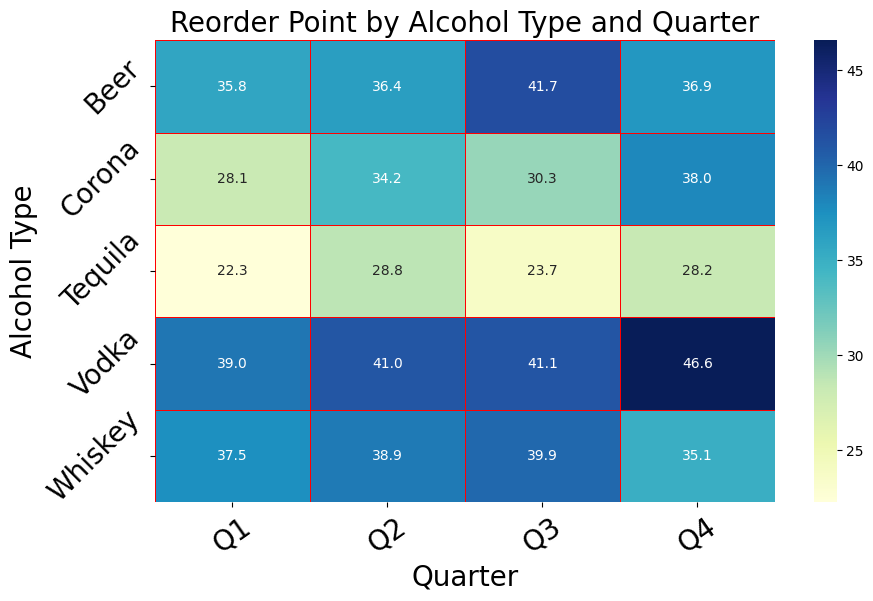

In [33]:
plt.figure(figsize = (10,6))
heatmap_data = weekly_stats.pivot_table(
    index = 'Alcohol Type',
    columns = 'Quarter',
    values = 'Reorder Point'
)

sns.heatmap(heatmap_data, annot = True, cmap = 'YlGnBu', fmt = ".1f", linewidths=.5, linecolor = 'red')

plt.title("Reorder Point by Alcohol Type and Quarter", fontsize=20)
plt.xlabel("Quarter", fontsize=20)
plt.ylabel("Alcohol Type", fontsize=20)
plt.xticks(rotation=35, fontsize=20)
plt.yticks(rotation=45, fontsize=20)
plt.show()

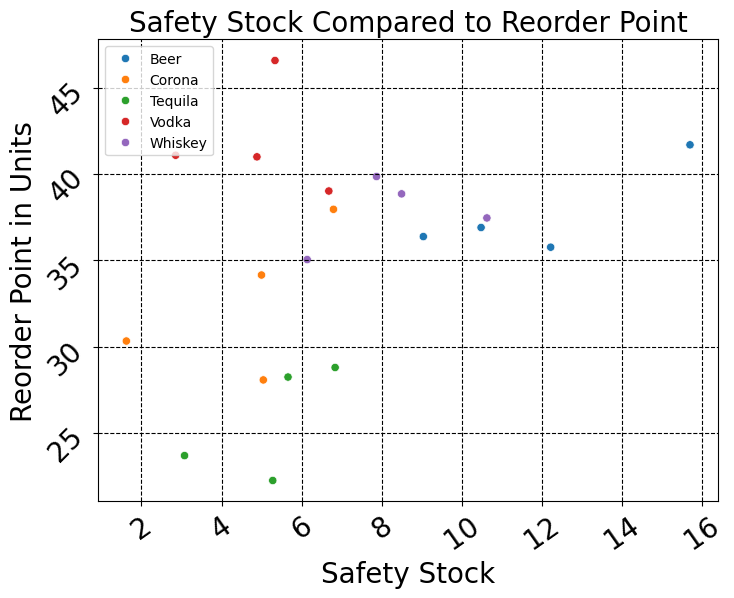

In [34]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = "Safety Stock", y = "Reorder Point", hue = "Alcohol Type", data = weekly_stats)
plt.legend(loc = "upper left", fontsize = 10)
plt.title("Safety Stock Compared to Reorder Point", fontsize = 20)
plt.xlabel("Safety Stock", fontsize = 20)
plt.ylabel("Reorder Point in Units", fontsize = 20)
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks(rotation = 45, fontsize = 20)
plt.grid(linestyle = "--", color = "black")

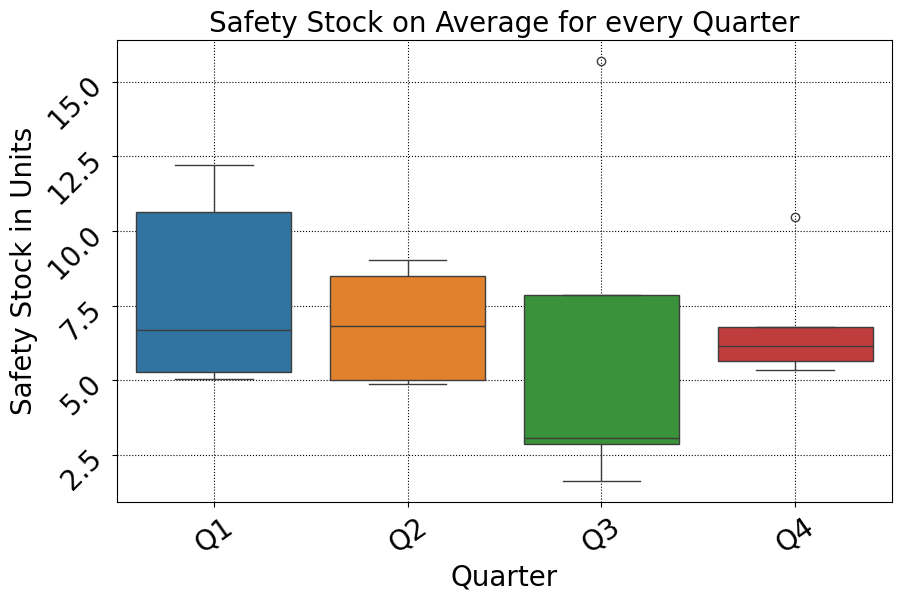

In [35]:
plt.figure(figsize = (10,6))
sns.boxplot(x = "Quarter", y = "Safety Stock", data = weekly_stats, hue = "Quarter")
sns.set_context("poster")
plt.title("Safety Stock on Average for every Quarter", fontsize = 20)
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks(rotation = 45, fontsize = 20)
plt.xlabel("Quarter", fontsize = 20)
plt.ylabel("Safety Stock in Units", fontsize = 20)
plt.grid(linestyle = ":", color = "black")
plt.show()

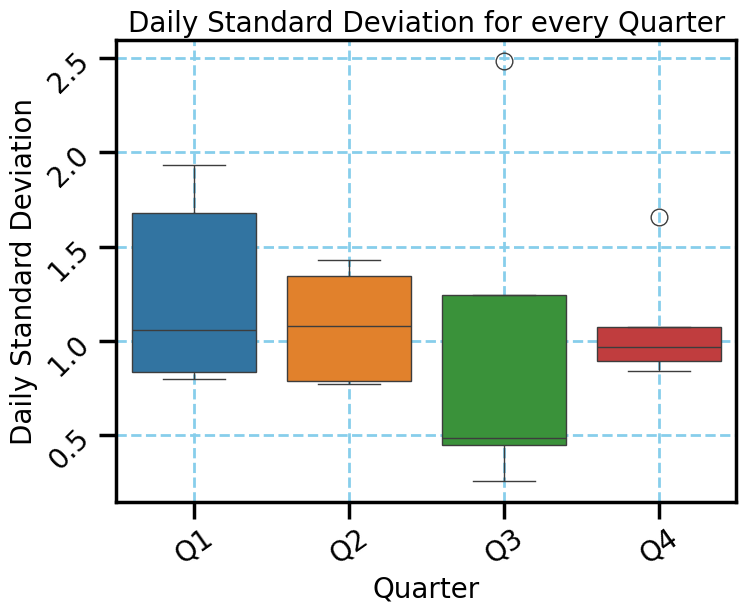

In [36]:
plt.figure(figsize = (8,6))
sns.boxplot(x = "Quarter", y = "Daily Std Dev", hue = "Quarter", data = weekly_stats)
plt.title("Daily Standard Deviation for every Quarter", fontsize = 20)
plt.yticks(rotation = 45, fontsize = 20)
plt.xticks(rotation = 35, fontsize = 20)
plt.xlabel("Quarter", fontsize = 20)
plt.ylabel("Daily Standard Deviation", fontsize = 20)
plt.grid(linestyle = "dashed", color = "skyblue")
plt.show()

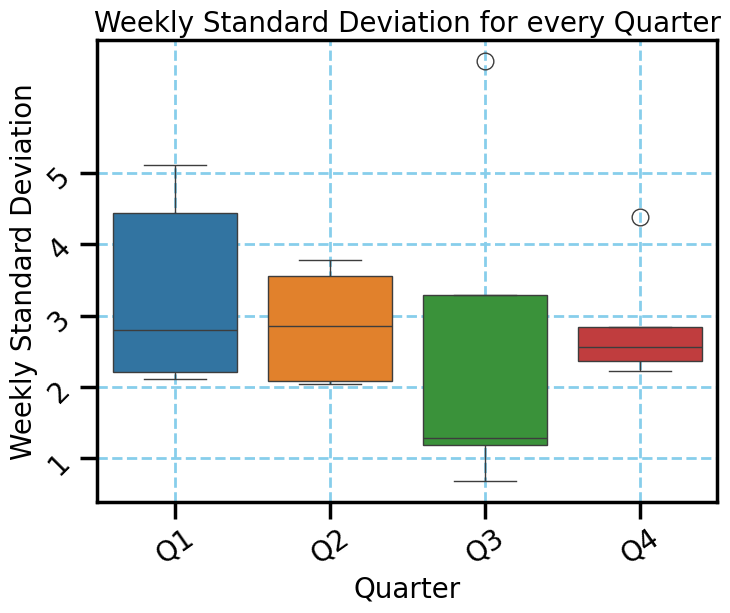

In [37]:
plt.figure(figsize = (8,6))
sns.boxplot(x = "Quarter", y = "Weekly Std Dev", hue = "Quarter", data = weekly_stats)
plt.title("Weekly Standard Deviation for every Quarter", fontsize = 20)
plt.yticks(range(1,6,1),rotation = 45, fontsize = 20)
plt.xticks(rotation = 35, fontsize = 20)
plt.xlabel("Quarter", fontsize = 20)
plt.ylabel("Weekly Standard Deviation", fontsize = 20)
plt.grid(linestyle = "dashed", color = "skyblue")
plt.show()

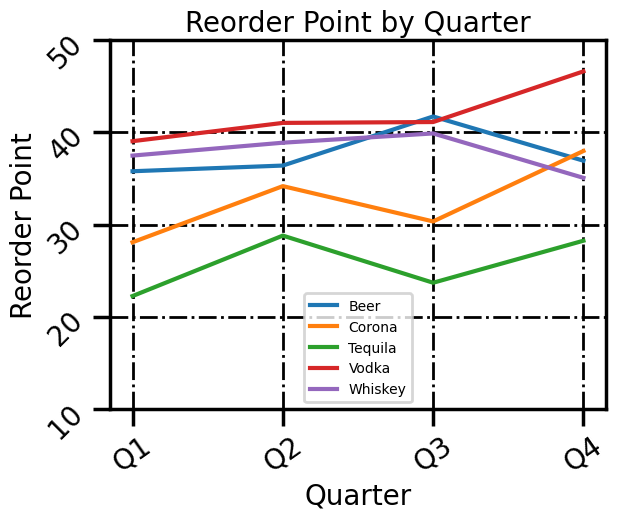

In [38]:
sns.lineplot(x = "Quarter", y = "Reorder Point", hue = "Alcohol Type", data = weekly_stats)

plt.legend(loc = "lower center", fontsize = 10)
plt.title("Reorder Point by Quarter", fontsize = 20)
plt.grid(linestyle = "dashdot", color = "black")
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks(range(10,60,10), rotation = 45, fontsize = 20)
plt.xlabel("Quarter", fontsize = 20)
plt.ylabel("Reorder Point", fontsize = 20)
plt.show()

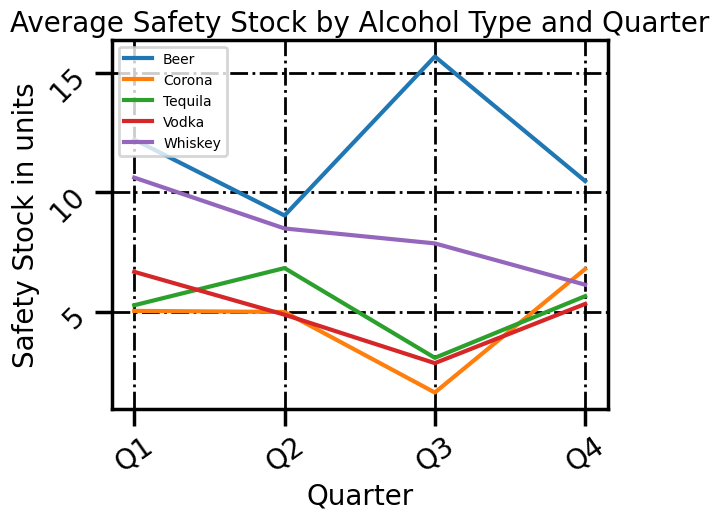

In [39]:
sns.lineplot(x = "Quarter", y = "Safety Stock", hue = "Alcohol Type", data = weekly_stats)

plt.legend(loc = "lower center", fontsize = 10)
plt.title("Average Safety Stock by Alcohol Type and Quarter", fontsize = 20)
plt.grid(linestyle = "dashdot", color = "black")
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks( rotation = 45, fontsize = 20)
plt.xlabel("Quarter", fontsize = 20)
plt.ylabel("Safety Stock in units", fontsize = 20)
plt.legend(loc = "upper left", fontsize = 10)
plt.show()

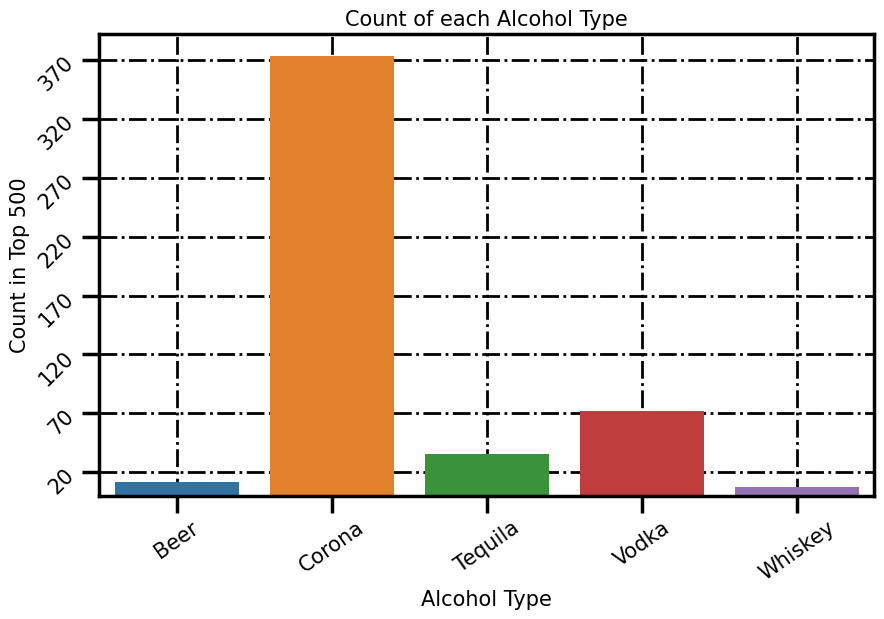

In [40]:
plt.figure(figsize = (10,6))
sns.barplot(x = "Alcohol Type", y = "Count in top 500", hue = "Alcohol Type", data = weekly_stats)
sns.set_context("poster")
plt.title("Count of each Alcohol Type", fontsize = 15)
plt.ylabel("Count in Top 500", fontsize = 15)
plt.xlabel("Alcohol Type", fontsize = 15)
plt.grid(linestyle = "-.", color = "black")
plt.xticks(rotation = 35, fontsize = 15)
plt.yticks(range(20,400,50), rotation = 45, fontsize = 15)
plt.gca().set_axisbelow(True)
plt.show()

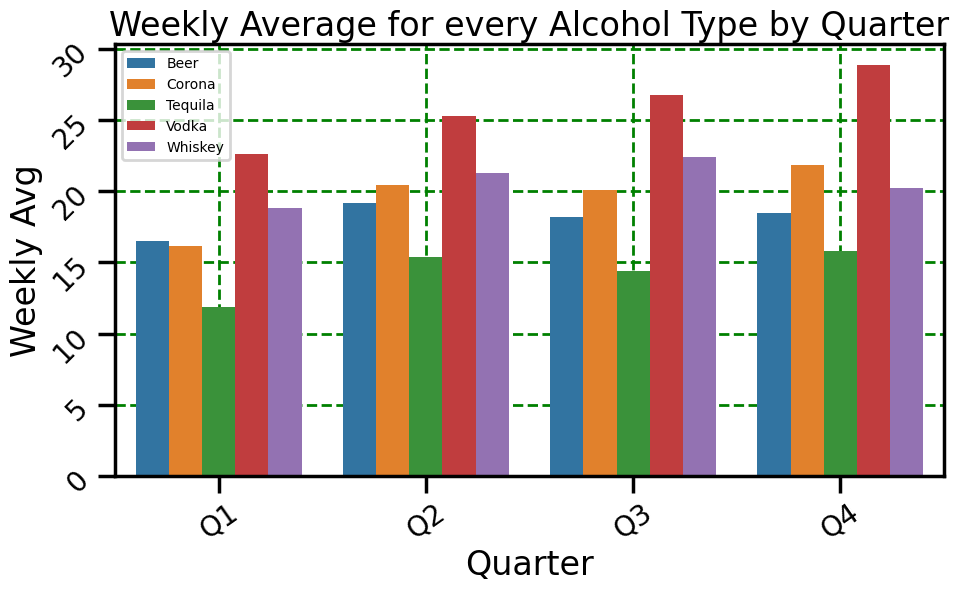

In [41]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Quarter', y = 'Weekly Avg', data = weekly_stats, hue = 'Alcohol Type' )
sns.set_context("poster")
plt.tight_layout()
plt.legend(loc = 'upper left', fontsize = 10)
plt.title("Weekly Average for every Alcohol Type by Quarter")
plt.grid(linestyle = "--", color = "green")
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks( rotation = 45, fontsize = 20)
plt.gca().set_axisbelow(True)
plt.show()

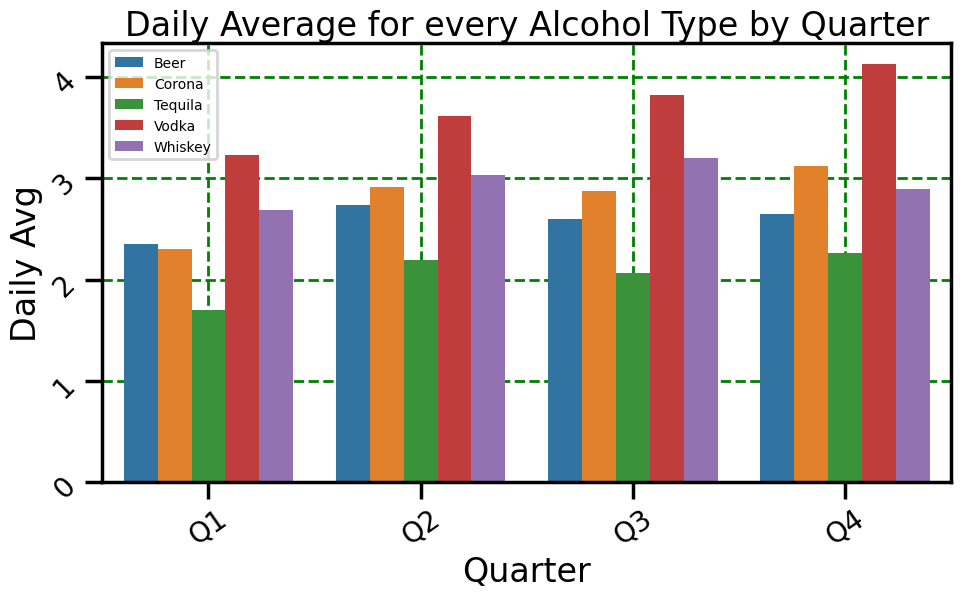

In [42]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Quarter', y = 'Daily Avg', data = weekly_stats, hue = 'Alcohol Type' )
sns.set_context("poster")
plt.tight_layout()
plt.legend(loc = 'upper left', fontsize = 10)
plt.title("Daily Average for every Alcohol Type by Quarter")
plt.grid(linestyle = "--", color = "green")
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks( rotation = 45, fontsize = 20)
plt.gca().set_axisbelow(True)
plt.show()

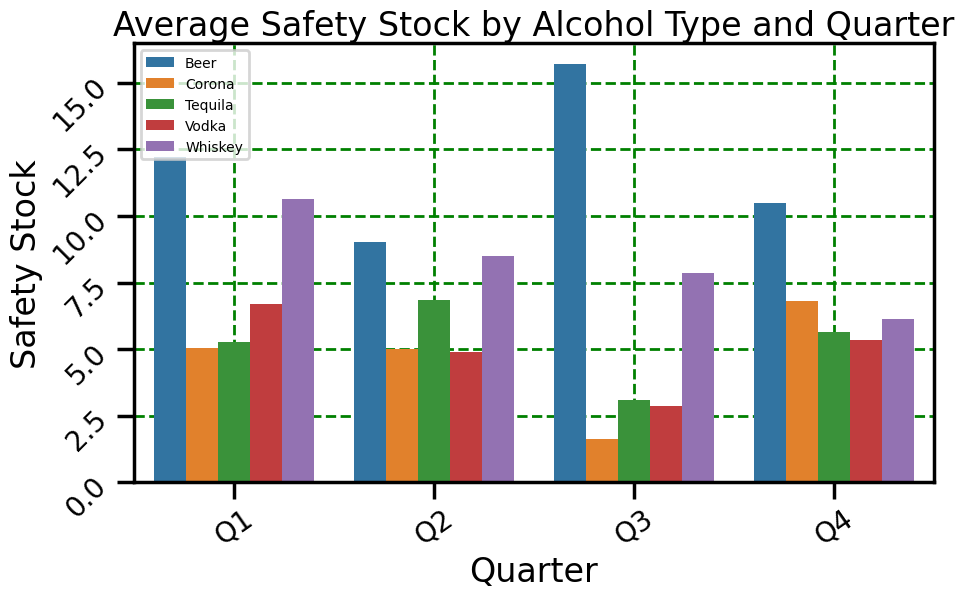

In [43]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Quarter', y = 'Safety Stock', data = weekly_stats, hue = 'Alcohol Type' )
sns.set_context("poster")
plt.tight_layout()
plt.legend(loc = 'upper left', fontsize = 10)
plt.title("Average Safety Stock by Alcohol Type and Quarter")
plt.grid(linestyle = "--", color = "green")
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks(rotation = 45, fontsize = 20)
plt.gca().set_axisbelow(True)
plt.show()

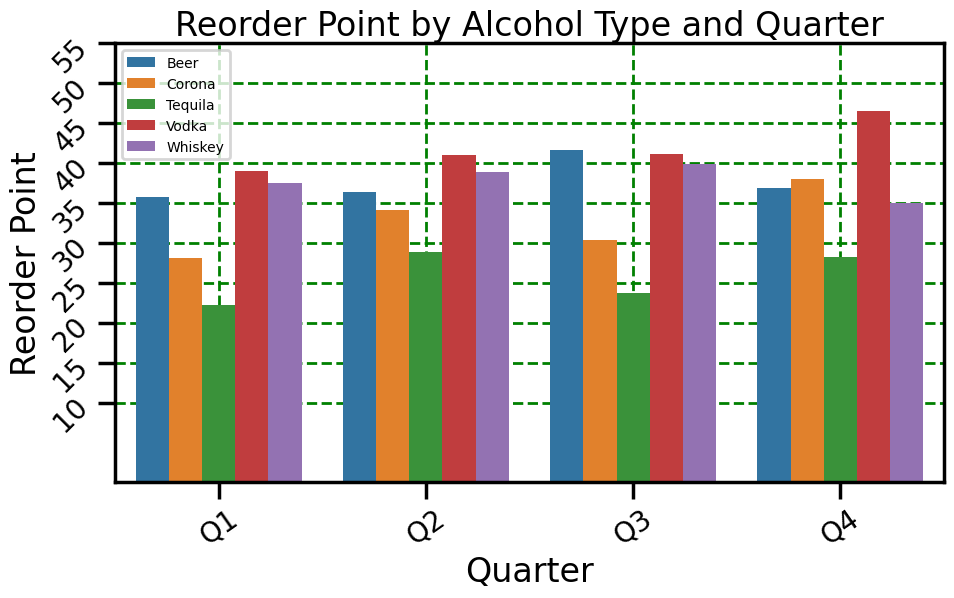

In [44]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'Quarter', y = 'Reorder Point', data = weekly_stats, hue = 'Alcohol Type' )
sns.set_context("poster")
plt.tight_layout()
plt.legend(loc = 'upper left', fontsize = 10)
plt.title("Reorder Point by Alcohol Type and Quarter")
plt.grid(linestyle = "--", color = "green")
plt.xticks(rotation = 35, fontsize = 20)
plt.yticks(range(10,60,5), rotation = 45, fontsize = 20)
plt.gca().set_axisbelow(True)
plt.show()